In [1]:
from google.colab import files
import zipfile
import pandas as pd
#uploading files
uploaded = files.upload()
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("data")
        print("✅ Dataset extracted to 'data/' folder")


Saving online+retail.zip to online+retail.zip
✅ Dataset extracted to 'data/' folder


In [2]:
import os

# Check extracted files
print("Extracted files:", os.listdir("data"))


Extracted files: ['Online Retail.xlsx']


In [5]:
df = pd.read_excel("data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df = df.dropna()

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Day'] = df['InvoiceDate'].dt.day

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Month        406829 non-null  int32         
 9   Year         406829 non-null  int32         
 10  Day          406829 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 32.6+ MB


In [14]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

sales_trend = df.groupby('InvoiceDate')['Sales'].sum()
# Assuming 'Category' column exists or needs to be created
# category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
monthly_sales = df.groupby('Month')['Sales'].sum()

sales_trend.head(), monthly_sales.head()

(InvoiceDate
 2010-12-01 08:26:00    139.12
 2010-12-01 08:28:00     22.20
 2010-12-01 08:34:00    348.78
 2010-12-01 08:35:00     17.85
 2010-12-01 08:45:00    855.86
 Name: Sales, dtype: float64,
 Month
 1    475074.380
 2    436546.150
 3    579964.610
 4    426047.851
 5    648251.080
 Name: Sales, dtype: float64)

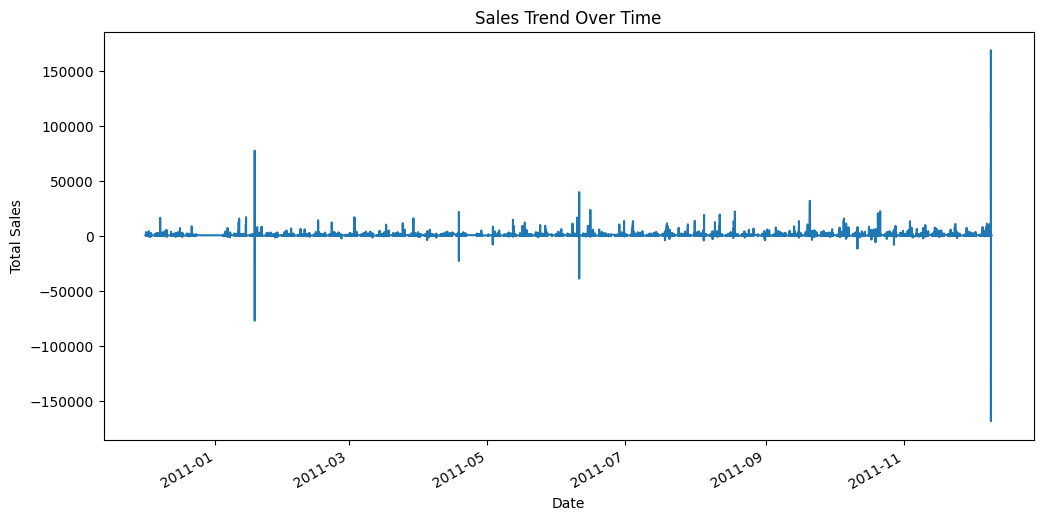

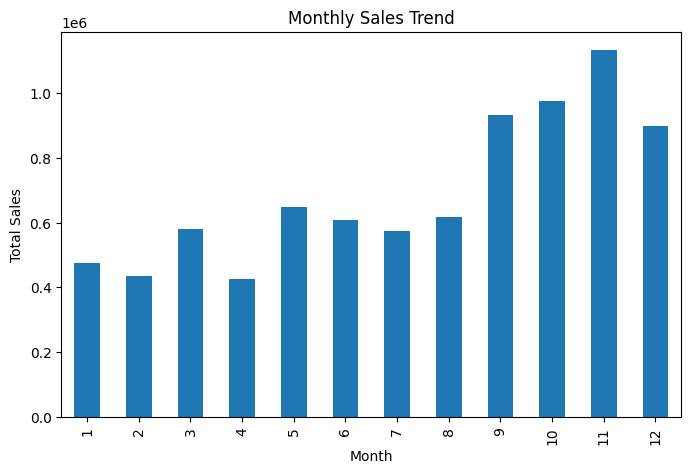

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trend over time
plt.figure(figsize=(12,6))
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Monthly sales trend
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [18]:
print(" Key Insights:")

print("\n Peak Sales Month:", monthly_sales.idxmax())
print(" Lowest Sales Month:", monthly_sales.idxmin())

print("\n Overall Trend: Sales are increasing over time" if sales_trend.is_monotonic_increasing else "Sales show seasonal variation")

 Key Insights:

 Peak Sales Month: 11
 Lowest Sales Month: 4
Sales show seasonal variation
